### Load, binarise and show image

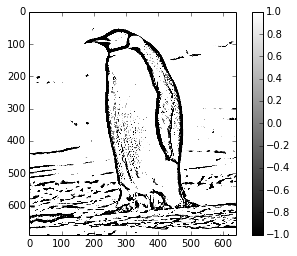

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage.filters import threshold_adaptive

IMAGE = 'penguin.jpg'

block_size = 40
image = np.array(Image.open(IMAGE).convert('L'))
image = threshold_adaptive(image, block_size, offset=10)
image_scaled = (image * 2) - 1

plt.gray()
plt.imshow(image_scaled)
plt.colorbar()
plt.show()

### Add noise

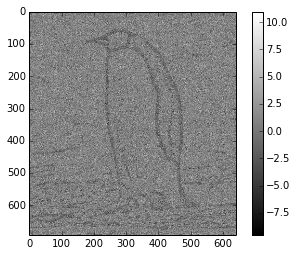

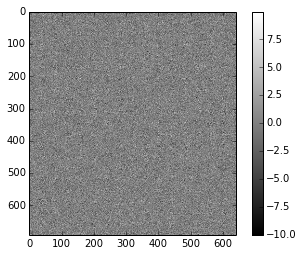

<function matplotlib.pyplot.bar>

In [3]:
noise = 2*np.random.randn(image.shape[0]*image.shape[1]).reshape(image.shape)

#noise = np.random.randint(-1,2,image.shape)
#noise = np.zeros(image.shape)
#noise[300:350] = 1

#noisey_image = np.clip(image + noise, 0, 1)
#noisey_image = (noisey_image * 2) - 1

noisey_image = (image_scaled + noise)
plt.gray()
plt.imshow(noisey_image)
plt.colorbar()
plt.show()
plt.bar

plt.imshow(noise)
plt.colorbar()
plt.show()
plt.bar

In [18]:
# Helper functions for the updates

def convolve(matrix, weights):
    directions = [-1, 0, 1]
    h, w = matrix.shape
    conv = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            for step_one in directions:
                for step_two in directions:
                    x = step_one + i
                    y = step_two + j
                    if (x >= 0) and (y >= 0) and (x < h) and (y < w):
                        conv[i, j] += weights[step_one + 1, step_two + 1] * matrix[x, y]
    return conv

def fast_convolve(matrix, weights):
    h, w = matrix.shape
    conv = np.zeros((h, w))
    matrix = np.pad(matrix,((1, 1), (1, 1)),mode='constant')
    for i in range(h):
        for j in range(w):
            conv[i, j] = (matrix[i:i + 3,j:j + 3] * weights).sum()
    return conv
        
def prob(img, mu, sigma):
    # this is an optimisation
    res = np.exp(-((img - mu)**2 / (2 * sigma**2)))
    res = res / (sigma * np.sqrt(2 * np.pi))
    return res

def logprob(img, sigma):
    log_plus = np.log(prob(img, 1, sigma))
    log_minus = np.log(prob(img,-1, sigma))
    return log_plus - log_minus
                       
def update(mu, weights, L):
    weighted_mu = fast_convolve(mu, weights)
    new_mu = np.tanh(weighted_mu + 0.5 * L)
    return new_mu


In [19]:
# Set model paramters and run updates

steps = np.arange(5)
mu = noisey_image
weights = np.ones((3, 3))
weights[1,1] = 0
decay = 1
sigma = 2
L = logprob(noisey_image, sigma)

for i in steps:
    mu = (1 - decay)*mu + (decay * update(mu, weights, L))
    
plt.gray()
plt.imshow(mu)
plt.colorbar()
plt.show()

plt.gray()
plt.imshow(image_scaled)
plt.colorbar()
plt.show()


In [26]:
# Some tests on convolution speeds
image_size = 1000
%time convolve(np.random.rand(image_size,image_size),np.random.rand(3,3))
%time fast_convolve(np.random.rand(image_size,image_size),np.random.rand(3,3))

CPU times: user 6.39 s, sys: 7.01 ms, total: 6.39 s
Wall time: 6.39 s
CPU times: user 3.51 s, sys: 204 ms, total: 3.72 s
Wall time: 3.58 s


array([[ 0.51471757,  1.25188866,  1.00314811, ...,  0.45306041,
         1.12462111,  0.47619171],
       [ 1.93490185,  2.44023343,  2.90903226, ...,  2.20452046,
         2.40350465,  1.1161161 ],
       [ 0.76736175,  2.1973135 ,  2.62318876, ...,  1.9016306 ,
         2.19900185,  1.27718605],
       ..., 
       [ 1.03885336,  3.0976453 ,  3.37493541, ...,  2.22793213,
         1.90174803,  0.71832909],
       [ 2.17905961,  2.23977766,  3.84708419, ...,  3.00643427,
         2.47464669,  1.29267843],
       [ 1.44063406,  2.24012913,  2.10570306, ...,  0.73494431,
         0.72714996,  0.62701479]])